# Automatizce ve fyzice: Visualizace dat

Petr Čermák  
2024-10-24

# Cvičení

## Připojte se!

[cermak.science/teaching/automation/lectures/04-fitovani/](https://cermak.science/teaching/automation/lectures/04-fitovani/)

## Prázdný quarto logbook

Vytvořte nový soubor (ctrl+shift+p New quarto)

``` {markdown}
---
title: "Susceptibility measurement"
date: 2024-10-24
author:
  - name: Petr Čermák
    email: petr.cermak@matfyz.cuni.cz
    url: https://cermak.science/
    affiliation: 
      - name: Charles University
        city: Prague
        state: Czech republic
        url: https://kfkl.mff.cuni.cz/
abstract: > 
  Ukázka měřícího protokolu.
keywords:
  - Automation
  - Physics
license: "CC 0"
title-block-banner: true
toc: true
number-sections: true
bibliography: references.bib
csl: ../aps.csl
highlight-style: pygments
format:
  html:
    code-fold: true
    code-tools: true
  pdf:
    geometry: 
      - top=30mm
      - left=30mm
jupyter: python3
---
# My super experiment 

## Preparation

We have came to the room, glued the sample and started the measurement.
```

## Porovnání knihoven pro fitování: SciPy, lmfit, iminuit

| **Knihovna** | **Hlavní vlastnosti** | **Výhody** | **Nevýhody** |
|------|--------------------------|---------------------|--------------------|
| **SciPy** | Základ<br> `curve_fit` | Jednoduché (?) použití | Nelze snadno přidat omezení parametrů. |
| **lmfit** | Nadstavba nad SciPy s pokročilým rozhraním pro fitování. | Omezení a pevně dané parametry. | Větší overhead, u nelineárních někdy diverguje. |
| **iminuit** | Optimalizační knihovna založená na algoritmu Minuit (CERN). Gradientní sestupy, numerické odhady derivací | Rychlé a přesné fitování. <br> Výborné pro nelineární a složité problémy, určije chyby a korelace parametrů. | \- Vyžaduje více konfigurace.<br> - Složitější pro začátečníky. |

## iMinuit

In [1]:
# !python -m pip install iminuit

import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares

# Funkce pro Gaussovu křivku
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

np.random.seed(42)  # Pro opakovatelnost výsledků

angles = np.linspace(-10, 10, 100)
true_sigma = 1.5  # Výsledek

params = [ (100, -3),  # A, úhel
          (150, 0),
          (80, 3)  ]

## iMinuit

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.

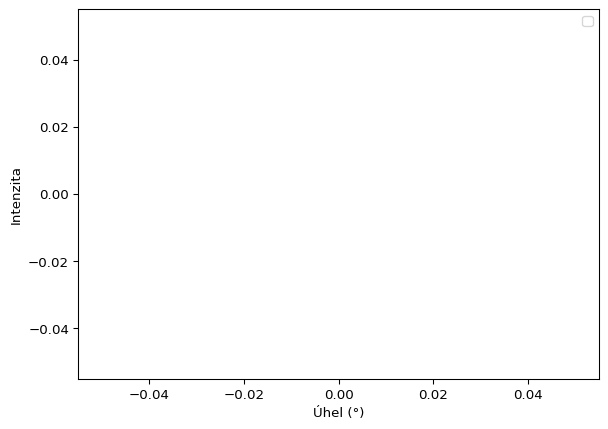

In [2]:
# Generování dat a přidání šumu
data = []
for A, mu in params:
    intensity = gauss(angles, A, mu, true_sigma) + np.random.normal(0, 5, angles.size)
    data.append(intensity)

# Vizualizace generovaných dat
for intensity, (A, mu) in zip(data, params):
    plt.plot() #???)

plt.xlabel('Úhel (°)')
plt.ylabel('Intenzita')
plt.legend()
plt.show()

## iMinuit

In [3]:
# Least squares cost function pro jednotlivé sady dat
def cost_func(A1, mu1, A2, mu2, A3, mu3, sigma):
    # Každá sada dat je hodnocena zvlášť, ale sdílí stejnou sigma
    chi2_1 = LeastSquares(angles, data[0], np.ones_like(data[0]) * 5, gauss)(A1, mu1, sigma)
    chi2_2 = LeastSquares(angles, data[1], np.ones_like(data[1]) * 5, gauss)(A2, mu2, sigma)
    chi2_3 = LeastSquares(angles, data[2], np.ones_like(data[2]) * 5, gauss)(A3, mu3, sigma)
    return chi2_1 + chi2_2 + chi2_3  # Součet všech chi^2

# Inicializace Minuit s počátečními odhady parametrů
m = Minuit(cost_func, A1=100, mu1=-3, A2=150, mu2=0, A3=80, mu3=3, sigma=1)

# Fitování
m.migrad()

# Výstup výsledků
print(m.values)
print(f"Fitovaná poloviční šířka (sigma): {m.values['sigma']}")

<ValueView A1=97.81956046158962 mu1=-3.0019066325926755 A2=149.8060320971459 mu2=0.018103000048898255 A3=78.1085963835439 mu3=3.003145548463833 sigma=1.5057810077888512>
Fitovaná poloviční šířka (sigma): 1.5057810077888512

## iMinuit

In [4]:
# Vizualizace fitovaných křivek

# použijte m.values['A1'], m.values['mu1'], m.values['sigma']

## Python Data Science

Nainstalujte extension Python Data Science

Obsahuje data wrangler

In [5]:
!curl https://user.mgml.eu/automation/vsm/00000001.dat --output 01.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 32937  100 32937    0     0   396k      0 --:--:-- --:--:-- --:--:--  412k

In [6]:
import pandas as pd
import re
pd.options.plotting.backend = "matplotlib"

header = {}
with open("01.dat", "r") as f:
    for line in f:
      if r := re.match(r'^INFO,([^,]*),([^,]*)$', line):
        header[r[2].strip()] = r[1]
      if line.strip() == "[Data]":
        break
    df = pd.read_csv(f, delimiter=",", index_col="Temperature (K)")

df.head()

## Pandas

In [7]:
# Zobrazí prvních 5 řádků dat
print("Prvních 5 řádků:")
print(df.head())

# Základní popis statistik dat
print("\nZákladní statistiky:")
print(df.describe())

# Zobrazení informací o datech (datové typy, null hodnoty, velikost atd.)
print("\nInformace o datech:")
print(df.info())

Prvních 5 řádků:
                Comment  Time Stamp (sec)  Magnetic Field (Oe)  Moment (emu)  \
Temperature (K)                                                                
1.894809            NaN        358.894085          2000.191002      0.000067   
3.078118            NaN        362.511599          2000.191002      0.000070   
4.010035            NaN        372.406449          2000.191002      0.000068   
5.069258            NaN        372.630530          2000.191002      0.000070   
5.995225            NaN        376.526731          2000.191002      0.000069   

                 M. Std. Err. (emu)  
Temperature (K)                      
1.894809               7.134839e-07  
3.078118               7.662391e-07  
4.010035               5.733090e-07  
5.069258               7.033015e-07  
5.995225               7.084128e-07  

Základní statistiky:
       Time Stamp (sec)  Magnetic Field (Oe)  Moment (emu)  M. Std. Err. (emu)
count        300.000000           300.000000    300.000

## Pandas

In [8]:
# Filtrování dat (např. výběr řádků, kde hodnota ve sloupci 'age' je větší než 30)
filtered_df = df[df['Time Stamp (sec)'] > 500]
print("\nFiltrování dle času")
print(filtered_df)

# Vytvoření nového sloupce (např. výpočet BMI na základě sloupců 'weight' a 'height')
df['Xi'] = 0 # #???
print("\nNový sloupec BMI:")
print(df[['Magnetic Field (Oe)',  'Moment (emu)', 'Xi']].head())


Filtrování dle času
                                                           Comment  \
Temperature (K)                                                      
25.928075                                                      NaN   
27.034747                                                      NaN   
27.987122                                                      NaN   
28.978676                                                      NaN   
30.051740                                                      NaN   
...                                                            ...   
297.021017                                                     NaN   
298.043718       sample offset = 34.54 mm touchdown = 9.3200001...   
298.950699                                                     NaN   
299.989653                                                     NaN   
301.094157                                                     NaN   

                 Time Stamp (sec)  Magnetic Field (Oe)  Moment (emu)

## Plotly

In [9]:
pd.options.plotting.backend = "plotly"

df[['Moment (emu)']].plot(y='Moment (emu)')